# **DLIP Tutorial - PyTorch**

## MNIST Classification using PyTorch
Y.-K. Kim
(updated 2024. 4. 29)



## For CoLab Usage:

1. Download this notebook
2. Then, open in Colab

The purpose of this tutorial is to learn how to build a simple Multi-Layer Percentron (MLP or ANN) for classification of handwritting digits (MNIST)

===================

## Setup Pytorch and Numpy and GPU

In [7]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import numpy as np 
import matplotlib.pyplot as plt

print(torch.__version__)

2.2.0


In [8]:
# Select GPU or CPU for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Prepare Datasets
### OpenDataset from TorchVision


1. Loading OpenDataset (Fashion MNIST) from Pytorch data
* ``Dataset``:  stores the samples and their corresponding labels
* ``DataLoader`` wraps an iterable around the ``Dataset``.


In [9]:
# Download Dataset from TorchVision MNIST
# Once, downloaded locally, it does not download again.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),   #converts 0~255 value to 0~1 value.
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

2. Use  ``DataLoader`` to  make dataset iterable.
* supports automatic batching, sampling, shuffling and multiprocess data loading.



In [10]:
# Create DataLoader with Batch size N
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


3. Plot some training data


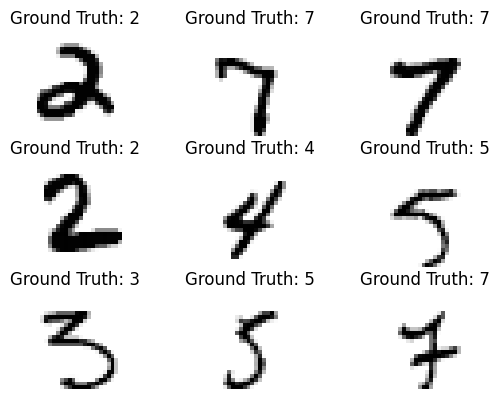

In [11]:
# Visualize some Datasets
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

figure = plt.figure()
num_of_images = 9
for index in range(num_of_images):
    plt.subplot(3, 3, index+1)
    plt.axis('off')
    plt.title("Ground Truth: {}".format(labels[index]))
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Define model

create a class that inherits from nn.Module


* Define the layers of the network in  __init__ function
* Specify Forward network in the **forward function.**

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/mlp-mnist.png?raw=1)


* Image Input: 1x28x28  image
* Flatten into a 1*784 element vector
* 1st Layer: linear to 250 dimensions / ReLU
* 2nd Layer: linear to 100 dim / ReLU
* 3rd Layer: linear to 10 dim / log SoftMax
* Output:  1x10

Actication function: ReLU

**NOTE**


1) nn.Linear(InputDim, OutputDim)

2) x.view( )
* Similar to  NumPy Reshape(). /// [batch size, height * width]


### 

In [58]:
# Model Architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # 1st layer (28*28) into 1-D vector
        self.flatten = nn.Flatten() 
        # 1st layer to 2nd layer
        self.linear1 = nn.Linear(28*28, 250)
        # 2nd layer to 3rd layer
        self.linear2 = nn.Linear(250, 100)
        # 3rd layer to output (0~9)
        self.linear3 = nn.Linear(100, 10)


    def forward(self, x):
        x=self.flatten(x)
        x = F.sigmoid(self.linear1(x))
        x = F.sigmoid(self.linear2(x))
        y_pred = F.log_softmax(self.linear3(x))
        return y_pred


model = MLP().to(device)
print(model)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


## Weight Initialization
 In Keras, dense layers by default uses “glorot_uniform” random initializer, it is also called Xavier normal initializer.

# Optimization Setup  

### Optmizer function
 Gradient descent is the common optimisation strategy used in neural networks. Many of the variants and advanced optimisation functions now are available,
  
- Stochastic Gradient Descent, Adagrade, Adam, etc

### Loss function

1. Linear regression->Mean Squared Error
2. Classification->Cross entropy,

In [62]:
# Loss Function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train the model
### Define train() function
Reuse this function in other tutorials


In [63]:
# Train Module
def train(dataloader, model, loss_fn, optimizer):
    # Dataset Size
    size = len(dataloader.dataset)
    
    # Model in Training Mode
    model.train()

    running_loss=0.0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Initialize the gradient to zero gradients for every batch
        optimizer.zero_grad()   

        # Compute prediction loss 
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation and Update        
        loss.backward()
        optimizer.step()        

        # Print loss for every 100 batch in an epoch
        running_loss+=loss.item()
        if batch % 100 == 0:
            running_loss=running_loss/100
            current = batch * len(X)
            print(f"loss: {running_loss:>7f}  [{current:>5d}/{size:>5d}]")
            running_loss=0

### Train
Print training process

In [71]:
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 0.000111  [    0/60000]


C:\Windows\Temp\ipykernel_21940\867323015.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  y_pred = F.log_softmax(self.linear3(x))


loss: 0.015188  [ 6400/60000]
loss: 0.016433  [12800/60000]
loss: 0.017024  [19200/60000]
loss: 0.017769  [25600/60000]
loss: 0.014657  [32000/60000]
loss: 0.019110  [38400/60000]
loss: 0.020922  [44800/60000]
loss: 0.021633  [51200/60000]
loss: 0.017305  [57600/60000]
Epoch 2
-------------------------------
loss: 0.000129  [    0/60000]
loss: 0.013505  [ 6400/60000]
loss: 0.011167  [12800/60000]
loss: 0.014619  [19200/60000]
loss: 0.015806  [25600/60000]
loss: 0.013939  [32000/60000]
loss: 0.013000  [38400/60000]
loss: 0.008768  [44800/60000]
loss: 0.014814  [51200/60000]
loss: 0.017203  [57600/60000]
Epoch 3
-------------------------------
loss: 0.000088  [    0/60000]
loss: 0.010561  [ 6400/60000]
loss: 0.008036  [12800/60000]
loss: 0.007108  [19200/60000]
loss: 0.013466  [25600/60000]
loss: 0.013588  [32000/60000]
loss: 0.012109  [38400/60000]
loss: 0.014195  [44800/60000]
loss: 0.011768  [51200/60000]
loss: 0.012746  [57600/60000]
Epoch 4
-------------------------------
loss: 0.00

# Test the model  ``eval()``

### Define **test()** function
Using ``eval()`` for test. Evaluate mode로 전환
This function can be reused in other tutorials

In [72]:
def test(dataloader, model, loss_fn):
    # Dataset Size
    size = len(dataloader.dataset)

    # Batch Size
    num_batches = len(dataloader)
    
    # Model in Evaluation Mode
    model.eval()

    test_loss, correctN = 0, 0
    
    # Disable grad() computation to reduce memory consumption.
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            
            # Compute average prediction loss 
            pred = model(X)            
            test_loss += loss_fn(pred, y).item()

            # Predict Label
            y_pred=pred.argmax(1);
            correctN += (y_pred == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correctN /= size
    print(f"Test Error: \n Accuracy: {(100*correctN):>0.1f}%, Avg loss: {test_loss:>8f} \n")



### Test
Print test data accuracy

In [73]:
test(test_dataloader, model, loss_fn)

C:\Windows\Temp\ipykernel_21940\867323015.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  y_pred = F.log_softmax(self.linear3(x))


Test Error: 
 Accuracy: 97.8%, Avg loss: 0.124597 



### Visualize Evaluation Results

Select random test images and evaluate

In [76]:
# Get some random test  images // BatchSize at a time
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
print(images.size())

# Evaluate mode
# Prediction of some sample images 
images, labels = images.to(device), labels.to(device)
with torch.no_grad():
    pred = model(images)
    _, predicted = torch.max(pred.data, 1)


torch.Size([64, 1, 28, 28])


C:\Windows\Temp\ipykernel_21940\867323015.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  y_pred = F.log_softmax(self.linear3(x))


Plot some test image results

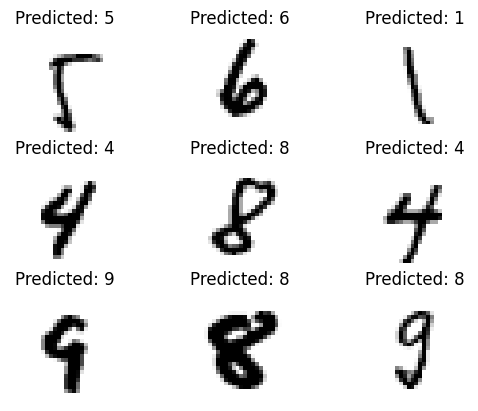

In [77]:
# Plot 
figure = plt.figure()
num_of_images = 9
for index in range(num_of_images):
    plt.subplot(3, 3, index+1)
    plt.axis('off')
    plt.title("Predicted: {}".format(predicted[index].item()))
    plt.imshow(images[index].cpu().numpy().squeeze(), cmap='gray_r')

### Saving Models
(Option 1) Save Model with Shapes
* save the structure of this class together with the model

In [35]:
torch.save(model,"MNIST_model.pth")

(Option 2) Save Model Weight as  state dictionary

In [36]:
torch.save(model.state_dict(), "MNIST_model2.pth")
print("Saved PyTorch Model State")

Saved PyTorch Model State


### Load the pretrained model

(Option 1) Loading a model with structures 

In [22]:
model = torch.load("MNIST_model.pth")
model.eval()

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)

(Option 2) Loading a model includes re-creating the model structure and loading the state dictionary into it.

* Need to `import` or define the Network Structure

In [46]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 250)
        self.linear2 = nn.Linear(250, 100)
        self.linear3 = nn.Linear(100, 10)

        
    def forward(self, x):
        x=self.flatten(x)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = F.softmax(self.linear3(x))
        return y_pred

In [44]:
model2 = MLP().to(device)
print(model2)
model2.load_state_dict(torch.load('MNIST_model2.pth'))
model2.eval()

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)

### Test 
Print test data accuracy 

In [55]:
test(test_dataloader, model, loss_fn)

C:\Windows\Temp\ipykernel_21940\769595406.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  y_pred = F.log_softmax(self.linear3(x))


Test Error: 
 Accuracy: 87.1%, Avg loss: 0.499029 



### Visualize test results

Select random test images and evaluate

In [56]:
# Get some random test  images // BatchSize at a time
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
print(images.size())

# Evaluate mode
# Prediction of some sample images 
images, labels = images.to(device), labels.to(device)
with torch.no_grad():
    pred = model(images)
    _, predicted = torch.max(pred.data, 1)

torch.Size([64, 1, 28, 28])


C:\Windows\Temp\ipykernel_21940\769595406.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  y_pred = F.log_softmax(self.linear3(x))


Plot some test image results

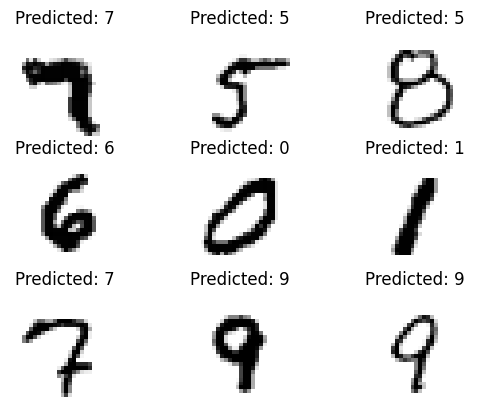

In [57]:
figure = plt.figure()
num_of_images = 9
for index in range(num_of_images):
    plt.subplot(3, 3, index+1)
    plt.axis('off')    
    plt.title("Predicted: {}".format(predicted[index].item()))
    plt.imshow(images[index].cpu().numpy().squeeze(), cmap='gray_r')



---



# Exercise


## Exercise 1
Change, activation functions and optimization types for a better output.

## Exercise 2
Rewrite  the above MLP model as the following.

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)